In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Crypto_Project\Data\train.csv')

We have read in our data but now need to resample the "timestamp" into hours

In [3]:
df['timestamp'] = df['timestamp'].astype('datetime64[s]')

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,2018-01-01 00:01:00,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,2018-01-01 00:01:00,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,2018-01-01 00:01:00,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
df[df.Asset_ID == 1].tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
24236739,2021-09-20 23:56:00,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
24236753,2021-09-20 23:57:00,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
24236767,2021-09-20 23:58:00,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN
24236781,2021-09-20 23:59:00,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN
24236795,2021-09-21 00:00:00,1,2698.0,43009.961250,43048.510000,42961.64,43002.505000,128.206820,43011.414052,NaN


In [32]:
df.Asset_ID.unique()

array([ 2,  0,  1,  5,  7,  6,  9, 11, 13, 12,  3,  8, 10,  4],
      dtype=int64)

In [7]:
df.describe()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676484e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [8]:
df[df.Volume < 0]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
15007600,2020-06-15 02:49:00,10,74.0,500.0,500.0,500.0,500.0,-1.110223e-16,-512.0,-0.001065
15008561,2020-06-15 04:00:00,10,9.0,475.0,475.0,475.0,475.0,-3.662812e-01,475.0,0.013781
15179186,2020-06-24 09:33:00,10,18.0,500.0,500.0,500.0,500.0,-1.387779e-17,-512.0,NaN


In [9]:
df[df.Asset_ID == 6].isna().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target       340
dtype: int64

In [10]:
df = df.set_index('timestamp')

In [11]:
bic = df[df.Asset_ID == 0]
btc = df[df.Asset_ID == 1]
btc_c = df[df.Asset_ID == 2]
car = df[df.Asset_ID == 3]
doge = df[df.Asset_ID == 4]
eos = df[df.Asset_ID == 5]
eth = df[df.Asset_ID == 6]
eth_c = df[df.Asset_ID == 7]
iota = df[df.Asset_ID == 8]
lite = df[df.Asset_ID == 9]
maker = df[df.Asset_ID == 10]
mon = df[df.Asset_ID == 11]
stel = df[df.Asset_ID == 12]
tron = df[df.Asset_ID == 13]

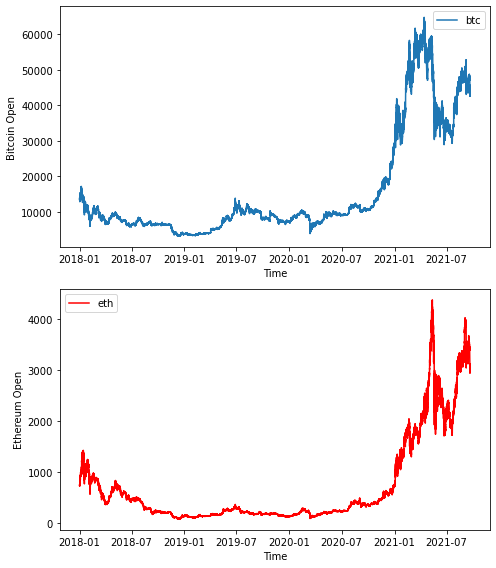

In [12]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(btc['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(eth['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

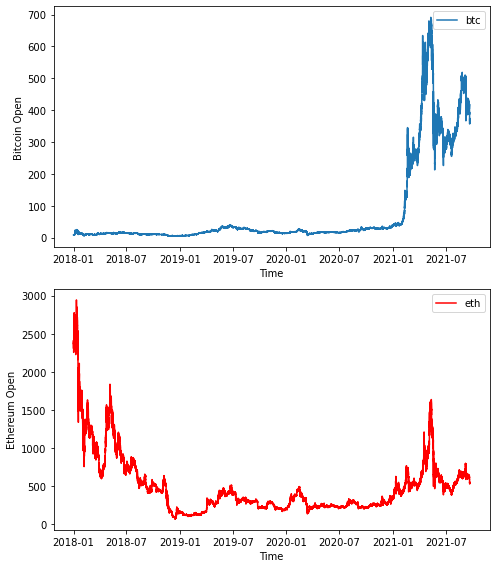

In [13]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(bic['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(btc_c['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

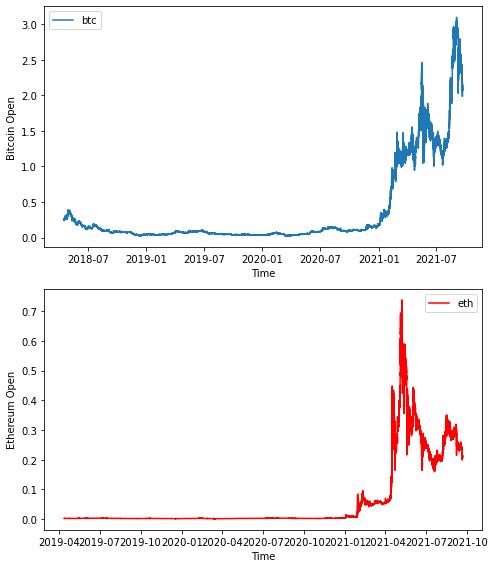

In [14]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(car['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(doge['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

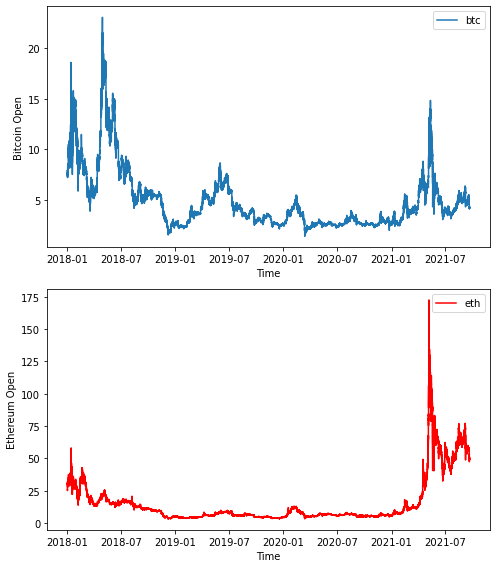

In [15]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(eos['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(eth_c['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

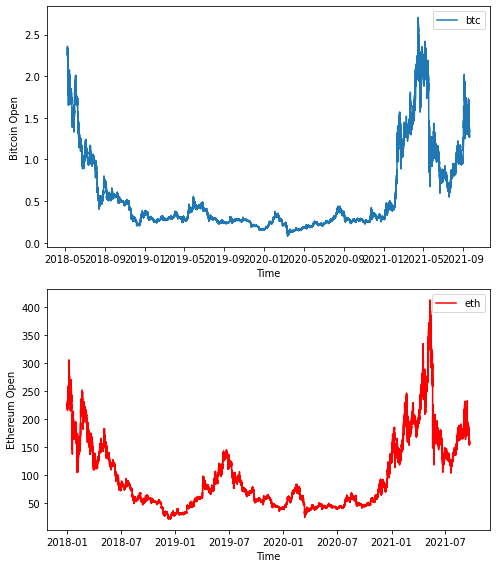

In [16]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(iota['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(lite['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

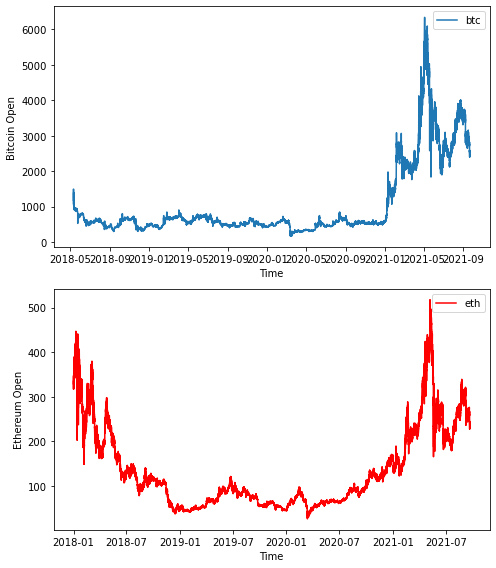

In [17]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(maker['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(mon['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

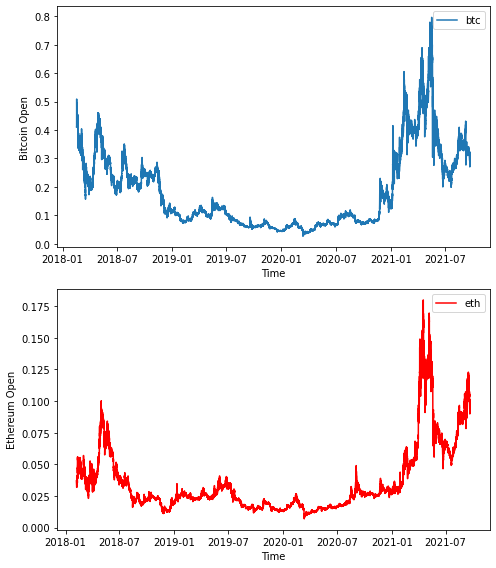

In [18]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(stel['Open'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Open')

ax2 = f.add_subplot(212)
ax2.plot(tron['Open'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Open')

plt.tight_layout()
plt.show()

In [19]:
def pct_changer(df_var):
    df_new = pd.DataFrame()
    df_new = pd.concat([df_new, df_var['Asset_ID']], axis=1)
    df_new = pd.concat([df_new, df_var[['Open', 'High', 'Low', 'Close', 'Count', 'Volume', 'VWAP', 'Target']].pct_change()], axis=1)
    return df_new

In [20]:
bic_pct = pct_changer(bic)
btc_pct = pct_changer(btc)
btc_c_pct = pct_changer(btc_c)
car_pct = pct_changer(car)
doge_pct = pct_changer(doge)
eos_pct = pct_changer(eos)
eth_pct = pct_changer(eth)
eth_c_pct = pct_changer(eth_c)
iota_pct = pct_changer(iota)
lite_pct = pct_changer(lite)
maker_pct = pct_changer(maker)
mon_pct = pct_changer(mon)
stel_pct = pct_changer(stel)
tron_pct = pct_changer(tron)

In [21]:
df_pct = pd.concat([bic_pct, btc_pct, btc_c_pct, car_pct, doge_pct, eos_pct, eth_pct, eth_c_pct, iota_pct, lite_pct, maker_pct, mon_pct, stel_pct, tron_pct], axis=0)

In [33]:
df_pct[df_pct.Asset_ID == 4].head()

,Asset_ID,Open,High,Low,Close,Count,Volume,VWAP,Target
2019-04-12 14:34:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12 14:35:00,4,-0.001081,0.0,-0.000721,0.000000,0.4,-0.633547,-0.000746,0.236631
2019-04-12 14:36:00,4,0.000361,0.0,0.000361,-0.001081,-0.5,2.089291,0.000731,0.142445
2019-04-12 14:37:00,4,0.000000,0.0,0.000361,0.000361,0.0,18.529338,-0.000698,0.082943
2019-04-12 14:38:00,4,-0.000361,0.0,-0.000361,0.000361,2.0,-0.959180,0.000206,-0.000360


In [23]:
#sns.lineplot(data=df_pct, x=df_pct.index, y='Open', hue='Asset_ID')

In [24]:
df_pct_pivot = pd.pivot_table(df_pct, values='Open',index=df_pct.index, columns='Asset_ID')

In [25]:
df_pct_pivot = df_pct_pivot.rename(columns={0:'BNB', 1:'BTC', 2:'BCH', 3:'ADA', 4:'DOGE', 5:'EOS', 6:'ETH',
                       7:'ETC', 8:'MIOTA', 9:'LTC', 10:'MKR', 11:'XMR', 12:'XLM', 13:'TRX'})



In [26]:
df_pct_pivot.head()

Asset_ID,BNB,BTC,BCH,ADA,DOGE,EOS,ETH,ETC,MIOTA,LTC,MKR,XMR,XLM,TRX
2018-01-01 00:02:00,0.000000,-0.000011,-0.000853,NaN,NaN,-0.000366,0.000278,-0.000887,NaN,-0.000873,NaN,0.001094,NaN,NaN
2018-01-01 00:03:00,-0.002755,-0.000805,-0.001230,NaN,NaN,0.000013,-0.000237,0.022107,NaN,0.005013,NaN,-0.000546,NaN,NaN
2018-01-01 00:04:00,-0.000658,-0.001547,0.001867,NaN,NaN,-0.000901,-0.001503,-0.000397,NaN,-0.005224,NaN,-0.003371,NaN,NaN
2018-01-01 00:05:00,-0.000024,-0.002645,-0.001432,NaN,NaN,-0.001856,-0.000939,-0.000283,NaN,-0.002544,NaN,0.000061,NaN,NaN
2018-01-01 00:06:00,-0.005258,-0.003508,-0.001623,NaN,NaN,-0.002174,-0.000933,-0.000983,NaN,-0.003207,NaN,0.011640,NaN,NaN


In [27]:
doge.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2019-04-12 14:34:00,4,10.0,0.002775,0.002775,0.002773,0.002775,192109.0,0.002775,0.006126
2019-04-12 14:35:00,4,14.0,0.002772,0.002775,0.002771,0.002775,70399.0,0.002773,0.007576
2019-04-12 14:36:00,4,7.0,0.002773,0.002775,0.002772,0.002772,217483.0,0.002775,0.008655
2019-04-12 14:37:00,4,7.0,0.002773,0.002775,0.002773,0.002773,4247299.0,0.002773,0.009373
2019-04-12 14:38:00,4,21.0,0.002772,0.002775,0.002772,0.002774,173376.0,0.002774,0.009369


<AxesSubplot:xlabel='Asset_ID', ylabel='Asset_ID'>

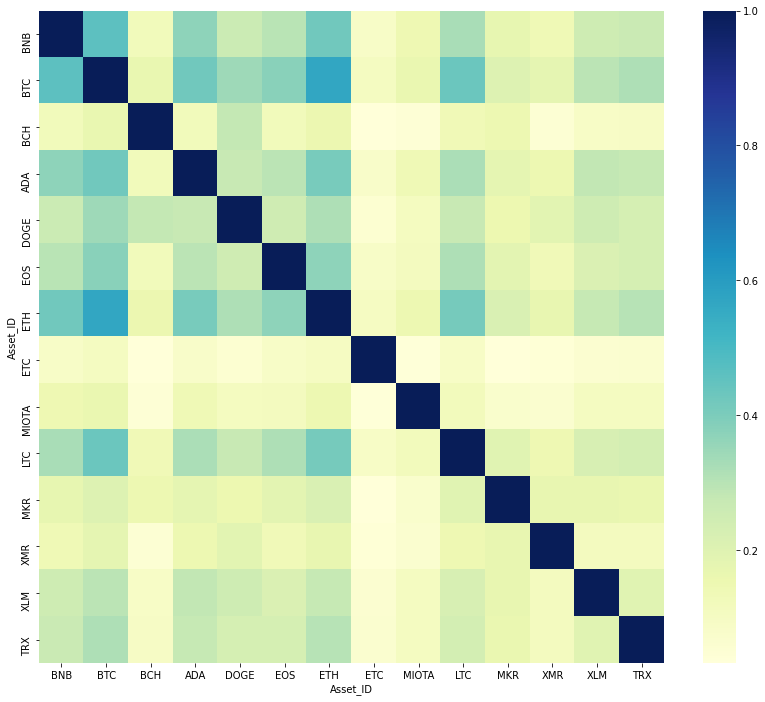

In [28]:
plt.subplots(figsize=(14,12))
sns.heatmap(data=df_pct_pivot.corr(), cmap='YlGnBu')

In [29]:
df_pct_pivot_cor = df_pct_pivot.corr()

In [30]:
df_pct_pivot_cor

Asset_ID,BNB,BTC,BCH,ADA,DOGE,EOS,ETH,ETC,MIOTA,LTC,MKR,XMR,XLM,TRX
Asset_ID,,,,,,,,,,,,,,
BNB,1.000000,0.461427,0.124930,0.372365,0.261617,0.298864,0.424089,0.085868,0.148468,0.327397,0.172648,0.140751,0.252346,0.266079
BTC,0.461427,1.000000,0.165343,0.422767,0.342699,0.378078,0.568626,0.108211,0.161745,0.436433,0.206387,0.183806,0.295418,0.316595
BCH,0.124930,0.165343,1.000000,0.127189,0.280816,0.125247,0.161015,0.035790,0.047222,0.136972,0.150129,0.052984,0.089543,0.095933
ADA,0.372365,0.422767,0.127189,1.000000,0.273574,0.296743,0.407825,0.085502,0.142364,0.319971,0.183200,0.149989,0.285240,0.277020
DOGE,0.261617,0.342699,0.280816,0.273574,1.000000,0.251501,0.316835,0.058584,0.111998,0.273772,0.153824,0.188531,0.255208,0.231529
EOS,0.298864,0.378078,0.125247,0.296743,0.251501,1.000000,0.370465,0.086256,0.115000,0.316207,0.185395,0.133288,0.215305,0.232048
ETH,0.424089,0.568626,0.161015,0.407825,0.316835,0.370465,1.000000,0.104400,0.153718,0.414055,0.219955,0.170165,0.276305,0.301750
ETC,0.085868,0.108211,0.035790,0.085502,0.058584,0.086256,0.104400,1.000000,0.037386,0.091420,0.032820,0.041740,0.062489,0.066725
MIOTA,0.148468,0.161745,0.047222,0.142364,0.111998,0.115000,0.153718,0.037386,1.000000,0.121980,0.072717,0.063638,0.105447,0.105590


In [31]:
df_pct_pivot_cor[df_pct_pivot_cor < 1].max()

Asset_ID
BNB      0.461427
BTC      0.568626
BCH      0.280816
ADA      0.422767
DOGE     0.342699
EOS      0.378078
ETH      0.568626
ETC      0.108211
MIOTA    0.161745
LTC      0.436433
MKR      0.219955
XMR      0.188531
XLM      0.295418
TRX      0.316595
dtype: float64

In [34]:
#df_pct.to_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Crypto_Project\Data\df_pct.csv')